In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as srn
import statistics as sts
import datetime


In [2]:
df = pd.read_csv('pns-reduzido-2019.csv')

In [3]:
# Substitua os valores nulos na coluna 'Diagnóstico de TOC (Transtorno obsessivo compulsivo)' por zero
df['Diagnóstico de TOC (Transtorno obsessivo compulsivo) '].fillna(3, inplace=True)


In [4]:
df.isnull().sum()

Unnamed: 0                                                                                                                                                                                                                                                                0
Unidade da Federação                                                                                                                                                                                                                                                      0
Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc?     288821
Em geral, em que grau essa doença mental limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos etc.)?                                                              

In [5]:
# Filtra as amostras com diagnóstico igual a 1 e salva em um arquivo separado
df_diagnostico_3 = df[df['Diagnóstico de TOC (Transtorno obsessivo compulsivo) '] == 3]
df_diagnostico_3.to_csv('amostras_diagnostico_3.csv', index=False)


In [6]:
agrupado = df_diagnostico_3.groupby(['Diagnóstico de TOC (Transtorno obsessivo compulsivo) ']).size()
agrupado

Diagnóstico de TOC (Transtorno obsessivo compulsivo) 
3.0    288821
dtype: int64

In [7]:
df_diagnostico_3.isnull().sum()

Unnamed: 0                                                                                                                                                                                                                                                                0
Unidade da Federação                                                                                                                                                                                                                                                      0
Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc?     288821
Em geral, em que grau essa doença mental limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos etc.)?                                                              

In [8]:
now = datetime.datetime.now()
# Defina os limites de idade desejados
limite_inferior = 7
limite_superior = 130

# Filtrar linhas com idade dentro do intervalo desejado
df_diagnostico_3 = df_diagnostico_3[(df_diagnostico_3['Ano de nascimento'] <= (now.year - limite_inferior)) & (df_diagnostico_3['Ano de nascimento'] >= (now.year - limite_superior))]

# Agora, df contém apenas as linhas com idade dentro do intervalo especificado (7 a 130 anos)


In [9]:
df_diagnostico_3 = df_diagnostico_3.drop(columns=['Faixa de rendimento domiciliar per capita (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico)'])
df_diagnostico_3 = df_diagnostico_3.drop(columns=['Qual é o curso que frequenta'])
df_diagnostico_3 = df_diagnostico_3.drop(columns=['E no passado, o(a) Sr(a) fumou algum produto do tabaco diariamente? '])
df_diagnostico_3 = df_diagnostico_3.drop(columns=['Alguma dessas doenças limita de alguma forma suas atividades habituais (trabalhar, ir à escola, brincar, afazeres domésticos, etc.)'])
df_diagnostico_3 = df_diagnostico_3.drop(columns=[' Qual foi o principal motivo de saúde que impediu ___ de realizar suas atividades habituais nas duas últimas semanas '])
df_diagnostico_3 = df_diagnostico_3.drop(columns=['Unnamed: 0'])

In [10]:
df_diagnostico_3.fillna(0, inplace=True)

In [11]:
df_diagnostico_3.isnull().sum()

Unidade da Federação                                                                                                                                                                                                                                                 0
Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc?     0
Em geral, em que grau essa doença mental limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos etc.)?                                                                                                                               0
Sexo                                                                                                                                                                                                               

In [12]:
agrupado = df_diagnostico_3.groupby(['Diagnóstico de TOC (Transtorno obsessivo compulsivo) ']).size()
agrupado

Diagnóstico de TOC (Transtorno obsessivo compulsivo) 
3.0    249552
dtype: int64

In [13]:
X = df_diagnostico_3

In [97]:
# Número ótimo de clusters pela técnica do cotovelo (Elbow)

from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    kmeanModel = KMeans(n_init="auto", n_clusters=k, random_state=1).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
print("Método Elbow concluído!")

Método Elbow concluído!


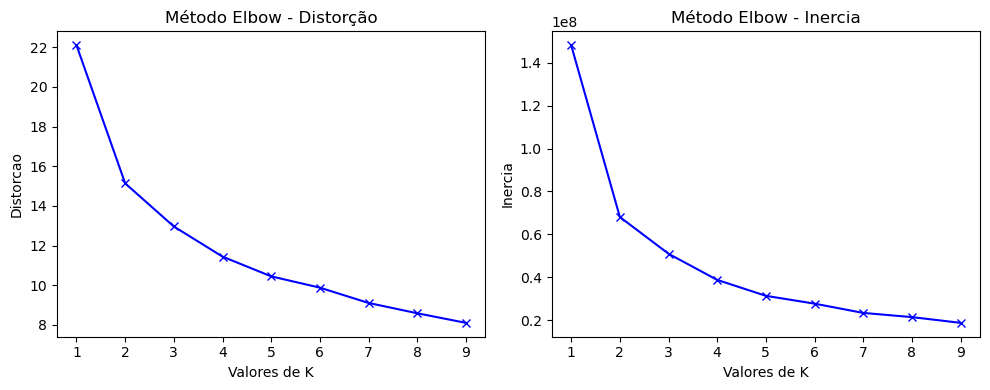

In [98]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# for key, val in mapping1.items():
#     print(f'{key} : {val}')

plt.subplot(1, 2, 1)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Distorcao')
plt.title('Método Elbow - Distorção')

# for key, val in mapping2.items():
#     print(f'{key} : {val}')

plt.subplot(1, 2, 2)
plt.plot(K, inertias, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Inercia')
plt.title('Método Elbow - Inercia')

fig.tight_layout()
plt.show()

In [99]:
# Número ótimo de clusters pela técnica de Silhoutte Index
#demora muito --- comentar esse código

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

bestK = []
for n_cluster in range(2, 11):
    kmeans = KMeans(n_init="auto", n_clusters=n_cluster, random_state=1).fit(X)
    labels = kmeans.labels_
    sil_coeff = silhouette_score(X, labels, metric='euclidean')
    bestK.append(sil_coeff)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
print('K = {}, Coeficiente = {}'.format(bestK.index(max(bestK))+2, max(bestK)))

KeyboardInterrupt: 

In [ ]:
k = bestK.index(max(bestK))+2
coef = max(bestK)
print("#Clusters K:", k, "\nCoeficiente:", coef)

NameError: name 'bestK' is not defined

In [14]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X)

In [15]:
labels = kmeans.labels_

In [16]:
toc_count = {}  # Dicionário para armazenar as contagens de diagnóstico de TOC

for cluster_num in range(10):
    # Filtra as amostras no cluster atual
    cluster_samples = df_diagnostico_3[labels == cluster_num]
    
    # Conta quantos diagnósticos de TOC igual a 2.0 estão presentes no cluster
    toc_count[cluster_num] = (cluster_samples['Diagnóstico de TOC (Transtorno obsessivo compulsivo) '] == 3.0).sum()

# 'toc_count' agora contém o número de diagnósticos de TOC igual a 2.0 em cada cluster
print(toc_count)

{0: 137501, 1: 112051, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


In [17]:
import pandas as pd

# Carregue o arquivo "pns-reduzido-2019.csv"
pns_reduzido = pd.read_csv('pns-reduzido-2019-notnull.csv')  

# Selecione aleatoriamente 2256 amostras com diagnóstico igual a 3 (===3) da base de dados 'amostras_diagnostico_3'
amostras_selecionadas_diagnostico_3 = df_diagnostico_3.sample(n=2542, random_state=42)

# Atualize o diagnóstico dessas amostras para 2 (===2)
amostras_selecionadas_diagnostico_3['Diagnóstico de TOC (Transtorno obsessivo compulsivo) '] = 2.0

# Concatene as amostras atualizadas com o DataFrame original
pns_reduzido = pd.concat([pns_reduzido, amostras_selecionadas_diagnostico_3])

# Salve o DataFrame atualizado no mesmo arquivo CSV
pns_reduzido.to_csv('pns-reduzido-2019-notnull-full.csv', index=False)  


In [18]:
df1 = pd.read_csv('pns-reduzido-2019-notnull-full.csv')

In [19]:
# Pessoas que tiveram diagnóstico de toc: 1.0, Pessoas que não tiveram: 2.0,
agrupado = df1.groupby(['Diagnóstico de TOC (Transtorno obsessivo compulsivo) ']).size()
agrupado


Diagnóstico de TOC (Transtorno obsessivo compulsivo) 
1.0    3661
2.0    3661
dtype: int64

In [20]:
df1.isnull().sum()

Unnamed: 0.1                                                                                                                                                                                                                                                         2542
Unnamed: 0                                                                                                                                                                                                                                                           2542
Unidade da Federação                                                                                                                                                                                                                                                    0
Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar,

In [21]:
df1 = df1.drop(['Unnamed: 0.1', 'Unnamed: 0', 'Por causa da doença mental Faz acompanhamento regular com profissional de saúde'], axis=1)

In [22]:
df1.isnull().sum()

Unidade da Federação                                                                                                                                                                                                                                                 0
Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc?     0
Em geral, em que grau essa doença mental limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos etc.)?                                                                                                                               0
Sexo                                                                                                                                                                                                               

In [23]:
df1.to_csv('pns-reduzido-2019-notnull-full.csv', index=False)


In [24]:
df1.isnull().sum()

Unidade da Federação                                                                                                                                                                                                                                                 0
Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc?     0
Em geral, em que grau essa doença mental limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos etc.)?                                                                                                                               0
Sexo                                                                                                                                                                                                               

In [25]:
df1.head()

,Unidade da Federação,"Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc?","Em geral, em que grau essa doença mental limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos etc.)?",Sexo,Cor ou raça,"De um modo geral, como é o estado de saúde de________",Com que frequência o(a) Sr(a) costuma consumir alguma bebida alcoólica?,Ano de nascimento,"Considerando saúde como um estado de bem-estar físico e mental, e não somente a ausência de doenças, como é o estado de saúde de _____________?",Algum médico já lhe deu algum diagnóstico de outra doença crônica (física ou mental) ou doença de longa duração (de mais de 6 meses de duração)?,Quando ____ consultou um médico pela última vez,O(A) Sr(a) visita o médico/serviço de saúde regularmente por causa dessa doença mental ou só quando tem algum problema?,"Atualmente, o(a) Sr(a) fuma algum produto do tabaco?",Diagnóstico de TOC (Transtorno obsessivo compulsivo)
0,11,2.0,2.0,2.0,2.0,3.0,1.0,1964.0,1.0,2.0,1.0,2.0,3.0,1.0
1,11,2.0,2.0,2.0,1.0,2.0,1.0,1989.0,2.0,1.0,1.0,1.0,3.0,1.0
2,11,2.0,2.0,2.0,1.0,3.0,1.0,1954.0,3.0,1.0,1.0,1.0,3.0,2.0
3,11,2.0,2.0,1.0,1.0,1.0,1.0,1996.0,1.0,2.0,1.0,2.0,2.0,1.0
4,11,1.0,2.0,2.0,4.0,1.0,1.0,1942.0,1.0,1.0,1.0,2.0,3.0,1.0
